In [1]:
!pip install pip

ERROR: To modify pip, please run the following command:
D:\anaconda\python.exe -m pip install pip
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [94]:
!pip install keras

In [95]:
!pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/e7/88/417f18ca7eed5ba9bebd51650d04a4af929f96c10a10fbb3302196f8d098/tensorflow-1.9.0-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/d5/c6/15728549704f9c03db7179b7f99303b91b7703e18a50f5e7b47e59b289ea/grpcio-1.13.0-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/75/7a/0dba607e50b97f6a89fa3f96e23bf56922fa59d748238b30507bfe361bbc/protobuf-3.6.0-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/9e/1f/3da43860db614e294a034e42d4be5c8f7f0d2c75dc1c428c541116d8cdab/tensorboard-1.9.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/48/a76be51647d0eb9f10e2a4511bf3ffb8cc1e6b14e9e4fab46173aa79f981/termcolor-1.1.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/5c/78/ff794fcae2ce8aa6323e789d1f8b3b7765f601e7702726f430e814822b96/gast-0.2.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/35/6b/11530768ca

In [ ]:
*******gina前2/3資料+oldmom A2做模型********
*******gina後1/3資料+oldmom A1資料做預測********

***資料預處理***

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from keras.utils import np_utils        #OneHot encoding用
np.random.seed(10)

C:\Users\Big data\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


data0 = pd.read_csv('C:/Users/ASUS/Desktop/action-aftershift/stand-0.csv')
data1 = pd.read_csv('C:/Users/ASUS/Desktop/action-aftershift/walk-1.csv')
data2 = pd.read_csv('C:/Users/ASUS/Desktop/action-aftershift/run-2.csv')
data3 = pd.read_csv('C:/Users/ASUS/Desktop/action-aftershift/lie-3.csv')
data4 = pd.read_csv('C:/Users/ASUS/Desktop/action-aftershift/sit-4.csv')

In [427]:
data0 = pd.read_csv('C:/Users/Big data/Desktop/action-aftershift/stand-0.csv')
data1 = pd.read_csv('C:/Users/Big data/Desktop/action-aftershift/walk-1.csv')
data2 = pd.read_csv('C:/Users/Big data/Desktop/action-aftershift/run-2.csv')
data3 = pd.read_csv('C:/Users/Big data/Desktop/action-aftershift/lie-3.csv')
data4 = pd.read_csv('C:/Users/Big data/Desktop/action-aftershift/sit-4.csv')

# concatData_x

In [428]:
#只取需要的6個col
col = ['accel_xout_scaled','accel_yout_scaled','accel_zout_scaled','gyro_xout_scaled','gyro_yout_scaled','gyro_zout_scaled']

data0 = data0[col]
data1 = data1[col]
data2 = data2[col]
data3 = data3[col]
data4 = data4[col]

In [429]:
#取前12000筆資料
data0 = data0[:16800]
data1 = data1[:16800]
data2 = data2[:16800]
data3 = data3[:16128]
data4 = data4[:672]

In [430]:
data0

,accel_xout_scaled,accel_yout_scaled,accel_zout_scaled,gyro_xout_scaled,gyro_yout_scaled,gyro_zout_scaled
0,1.97998,0.36377,-9.64600,0.80153,-2.12214,2.10687
1,1.90674,0.31250,-9.68994,-0.01527,-2.41985,1.54198
2,1.79443,0.43701,-9.72900,0.55725,-1.03053,1.19084
3,2.00439,0.38574,-9.67529,0.06107,-0.51145,0.69466
4,1.97998,0.44678,-9.80225,-0.09924,-0.53435,0.12977
5,1.99707,0.46143,-9.70215,0.67939,-1.25954,0.31298
6,1.94336,0.38086,-9.83643,1.39695,-0.98473,0.88550
7,1.92383,0.36865,-9.58252,1.66412,-2.09924,0.05344
8,1.94092,0.39551,-9.61670,1.49618,-2.77863,1.94656
9,1.79443,0.41260,-9.96338,2.94656,-3.41985,0.80153


In [431]:

data0_Array = data0.values
data1_Array = data1.values
data2_Array = data2.values
data3_Array = data3.values
data4_Array = data4.values


In [432]:
#合併data3_Array(趴) & data4_Array(坐)
data3_Array = np.vstack((data3_Array,data4_Array))

In [433]:
#看有多少資料(row,col)
data3_Array.shape

(16800, 6)

In [434]:
#將array從6個col轉成180個col   .reshape(row=總筆數除以30, col=全部)
data0_Array = data0_Array.reshape(len(data0_Array)//30,-1)    #原來(row=34290,col=6) -> reshape(row=34290/30=1143,col=34290*6/1143=180)
data1_Array = data1_Array.reshape(len(data1_Array)//30,-1)    # // -> 除以30後只取整數
data2_Array = data2_Array.reshape(len(data2_Array)//30,-1)
data3_Array = data3_Array.reshape(len(data3_Array)//30,-1)
#data4_Array = data4_Array.reshape(412,-1)

In [435]:
#查看資料
data0_Array.shape

(560, 180)

In [436]:
#資料垂直(縱向)合併
concatData_x = np.vstack((data0_Array,data1_Array,data2_Array,data3_Array))

In [437]:
#看資料樣子
concatData_x

array([[  1.97998,   0.36377,  -9.646  , ...,  -0.48855,  -3.00763,
          4.10687],
       [  1.61865,   0.12207,  -9.6167 , ...,  -3.52672,   0.1145 ,
          3.39695],
       [  1.73096,   0.32715,  -9.81689, ...,  -1.47328,  -2.36641,
          9.76336],
       ...,
       [  3.47412,   6.47705,  -6.74805, ...,  -3.85496,  -1.55725,
          3.30534],
       [  2.98096,   6.50879,  -6.76025, ..., -16.70992, -31.75573,
         24.99237],
       [ -4.78271,   4.09912,  -8.76709, ...,  -7.70992,   3.38931,
          3.45038]])

In [438]:
#看資料樣子
concatData_x.shape

(2240, 180)

In [439]:
concatData_x.dtype

dtype('float64')

# concatData_y

In [440]:
d_stand = np.zeros(shape=(len(data0_Array),1),dtype=int)   #建 762x1，值皆為 0

d_walk = np.zeros(shape=(len(data1_Array),1),dtype=int)   #建 6917x1，值皆為 0
d_walk[:,:] = 1                      #全部給值 1

d_run = np.zeros(shape=(len(data2_Array),1),dtype=int)      #建 375x1，值皆為 0
d_run[:,:] = 2                       #全部給值 2

d_rest = np.zeros(shape=(len(data3_Array),1),dtype=int)     #建 6825x1，值皆為 0
d_rest[:,:] = 3                       #全部給值 3

#d_sit = np.zeros(shape=(412,1))      #建 412X1，值皆為 0
#d_sit[:,:] = 4                       #全部給值 4


In [441]:
#看資料樣子
#d_stand
#d_walk
#d_run
d_rest ## => d_lie + d_sit

array([[3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
    

In [442]:
#看資料樣子
d_rest.shape

(560, 1)

In [443]:
#資料垂直(縱向)合併
concatData_y = np.vstack((d_stand,d_walk,d_run,d_rest))

In [444]:
#看資料樣子
concatData_y

array([[0],
       [0],
       [0],
       ...,
       [3],
       [3],
       [3]])

In [445]:
#看資料樣子
concatData_y.shape

(2240, 1)

In [446]:
#把y做 OneHot encoding
concatData_y = np_utils.to_categorical(concatData_y)

In [447]:
#看資料樣子
concatData_y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [448]:
#看資料樣子
concatData_y.shape

(2240, 4)

# concatData_x和concatData_y合併 => concatData

In [449]:
#橫向(水平線)合併
concatData = np.hstack((concatData_x,concatData_y)) 

In [450]:
#看資料樣子
concatData.shape

(2240, 184)

In [451]:
#看資料樣子
concatData[:1]

array([[  1.97998,   0.36377,  -9.646  ,   0.80153,  -2.12214,   2.10687,
          1.90674,   0.3125 ,  -9.68994,  -0.01527,  -2.41985,   1.54198,
          1.79443,   0.43701,  -9.729  ,   0.55725,  -1.03053,   1.19084,
          2.00439,   0.38574,  -9.67529,   0.06107,  -0.51145,   0.69466,
          1.97998,   0.44678,  -9.80225,  -0.09924,  -0.53435,   0.12977,
          1.99707,   0.46143,  -9.70215,   0.67939,  -1.25954,   0.31298,
          1.94336,   0.38086,  -9.83643,   1.39695,  -0.98473,   0.8855 ,
          1.92383,   0.36865,  -9.58252,   1.66412,  -2.09924,   0.05344,
          1.94092,   0.39551,  -9.6167 ,   1.49618,  -2.77863,   1.94656,
          1.79443,   0.4126 ,  -9.96338,   2.94656,  -3.41985,   0.80153,
          1.88232,   0.29541,  -9.82422,   2.79389,  -2.27481,   0.20611,
          1.86035,   0.26611,  -9.78271,   2.74046,  -1.41985,   0.75573,
          1.99707,   0.01221,  -9.67041,   0.80916,  -2.54962,   1.22137,
          1.88232,   0.02197,  -9.8266

# concatData隨機分成80%訓練資料20%測試資料

In [452]:
#隨機分成80%訓練20%測試
msk = np.random.rand(len(concatData)) < 0.8
train_df = concatData[msk]
test_df = concatData[~msk]

In [453]:
#顯示訓練和測試筆數
print('total:',len(concatData),
      'train:',len(train_df),
     'test:',len(test_df))

total: 2240 train: 1779 test: 461


In [454]:
#看資料樣子
test_df

array([[  1.61865,   0.12207,  -9.6167 , ...,   0.     ,   0.     ,
          0.     ],
       [  1.39893,   0.14648,  -9.71924, ...,   0.     ,   0.     ,
          0.     ],
       [  0.67627,   0.30762, -10.59082, ...,   0.     ,   0.     ,
          0.     ],
       ...,
       [ -1.74072,   4.36035,  -6.9043 , ...,   0.     ,   0.     ,
          1.     ],
       [  3.47412,   6.47705,  -6.74805, ...,   0.     ,   0.     ,
          1.     ],
       [  2.98096,   6.50879,  -6.76025, ...,   0.     ,   0.     ,
          1.     ]])

In [455]:
#看資料樣子
test_df.shape

(461, 184)

# 建立PreprocessData函數

In [456]:
#建立PreprocessData函數
def PreprocessData(concatData):
    #concatData_xArray = concatData_x.values
    #concatData_yArray = concatData_y.values    
    Label = concatData[:,180:]                                               #二維資料
    Features = concatData[:,:180]                                            #二維資料
    
    #dim2_concatData_x = Features.reshape((len(Features),1*180))        #三維轉二維 
    #Features = dim2_concatData_x
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))    #MinMaxScaler只接受二維資料
    scaledFeatures = minmax_scale.fit_transform(Features)
    
    return scaledFeatures,Label

In [457]:
#訓練資料和測試資料進行預處理
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

# 建立模型

In [575]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import Dropout

In [742]:
model = Sequential()

In [743]:
#建立 輸入層、隱藏層 1
model.add(Dense(units=1000,                     #隱藏層神經元個數                          #1000
               input_dim=180,                 #輸入層神經元個數
               kernel_initializer='normal',  #初始化weight(權重)和bias(偏差)的方法       #normal常態分布  #uniform平均分布
               activation='relu'))            #激活函數

In [744]:
#每次訓練迭代，會隨機在隱藏層中放棄50%神經元 -> 避免overfitting
model.add(Dropout(0.2))

In [745]:
#建立 隱藏層 2
model.add(Dense(units=1000,                     #隱藏層神經元個數                           #1000
               kernel_initializer='normal',  #初始化weight(權重)和bias(偏差)的方法       #normal常態分布  #uniform平均分布
               activation='relu'))            #激活函數

In [746]:
#每次訓練迭代，會隨機在隱藏層中放棄50%神經元 -> 避免overfitting
model.add(Dropout(0.2))

In [747]:
#建立 輸出層
model.add(Dense(units=4,                      #輸出層神經元個數 (輸出4個label)
               kernel_initializer='normal',  #初始化weight(權重)和bias(偏差)的方法       #normal
               activation='softmax'))         #激活函數
                          # sigmoid

# 開始訓練

In [748]:
#設定訓練模型
model.compile(loss='binary_crossentropy',   #損失函數loss function -> 訓練效果       #categorical_crossentropy
             optimizer='adam',              #最優化方法 -> 訓練更快收斂、提高準確率
             metrics=['accuracy'])          #評估模型方式 -> 算準確率

In [749]:
#執行訓練程式碼
train_history = model.fit(x=train_Features,      #輸入訓練資料參數 -> 特徵值 (features)
                         y=train_Label,          #輸入訓練資料參數 -> 真實值 (label)
                         validation_split=0.2,   #Keras自動將資料分成 -> 90%作為訓練資料、10%作為驗證資料    #0.2
                         epochs=100,              #訓練週期 -> 執行次數                                     #10
                         batch_size=50,         #每一批次 資料筆數                                        #200
                         verbose=2)              #顯示訓練過程

Train on 1423 samples, validate on 356 samples
Epoch 1/100
 - 2s - loss: 0.4255 - acc: 0.8076 - val_loss: 1.0373 - val_acc: 0.6966
Epoch 2/100
 - 1s - loss: 0.2963 - acc: 0.8614 - val_loss: 0.9372 - val_acc: 0.6713
Epoch 3/100
 - 1s - loss: 0.2708 - acc: 0.8825 - val_loss: 1.2918 - val_acc: 0.5822
Epoch 4/100
 - 1s - loss: 0.2709 - acc: 0.8811 - val_loss: 1.1377 - val_acc: 0.5822
Epoch 5/100
 - 1s - loss: 0.2422 - acc: 0.8981 - val_loss: 1.1383 - val_acc: 0.5239
Epoch 6/100
 - 1s - loss: 0.2451 - acc: 0.8927 - val_loss: 1.2526 - val_acc: 0.5892
Epoch 7/100
 - 1s - loss: 0.2413 - acc: 0.8920 - val_loss: 0.9063 - val_acc: 0.6671
Epoch 8/100
 - 1s - loss: 0.2438 - acc: 0.8939 - val_loss: 1.4586 - val_acc: 0.5098
Epoch 9/100
 - 1s - loss: 0.2429 - acc: 0.8874 - val_loss: 1.2875 - val_acc: 0.5836
Epoch 10/100
 - 1s - loss: 0.2636 - acc: 0.8758 - val_loss: 1.0593 - val_acc: 0.6699
Epoch 11/100
 - 1s - loss: 0.2374 - acc: 0.8956 - val_loss: 1.2901 - val_acc: 0.5934
Epoch 12/100
 - 1s - loss: 

In [750]:
#建立show_train_history顯示訓練過程
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):  #(訓練過程產生的train_history,訓練資料的執行結果,驗證資料的執行結果)
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')   
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

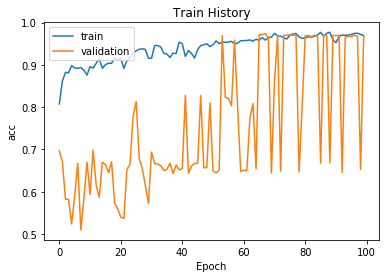

In [751]:
#畫出準確率執行結果              #訓練準確率 #驗證準確率
show_train_history(train_history, 'acc', 'val_acc')  

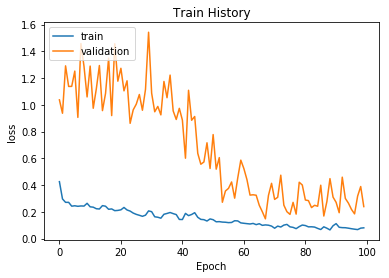

In [752]:
#畫出loss誤差執行結果             #訓練的誤差 #驗證的誤差
show_train_history(train_history, 'loss', 'val_loss')  

# 評估模型準確率

In [753]:
#評估模型準確率
scores = model.evaluate(x=test_Features,    #測試資料 的 特徵值 (features)
                       y=test_Label)        #測試資料 的 真實值 (label)

461/461 [==============================] - 0s 85us/step


In [754]:
scores[1]

0.9696312369596932

In [755]:
# 顯示 Model 評估測試資料的【損失函數誤差值】與【準確率】
print( 'loss =', scores[0] )
print( 'accuracy =', scores[1] )

loss = 0.14759324640520483
accuracy = 0.9696312369596932


# 進行預測 <gina+oldmom資料>

In [756]:
#匯入oldmom x資料   ##header=None，不把資料的第 1 row當作col名
data5 = pd.read_csv('C:/Users/Big data/Desktop/gina_log/sample_A1_all_noTime_6col.csv',header=None)
#匯入oldmom y資料
data5_y = pd.read_csv('C:/Users/Big data/Desktop/gina_log/sample_A1_all_noTime_Y_value-test5State.csv',header=None)

#x

In [757]:
data5

,0,1,2,3,4,5
0,-0.68604,-0.79346,-9.55322,1.82443,12.01527,4.87786
1,-1.01562,-0.88867,-9.76318,-1.86260,9.38931,4.34351
2,-0.72510,-0.78125,-9.70459,-3.45802,8.58779,2.92366
3,-0.74707,-0.13916,-9.74854,-4.38931,9.75573,3.15267
4,-0.29785,0.01221,-9.66797,-3.36641,-0.08397,5.09924
5,-0.42236,-0.23438,-9.87549,-1.74046,-8.27481,4.90840
6,-1.37939,-0.45410,-9.90723,-4.06870,0.87023,2.70229
7,-0.98389,-0.29297,-9.58252,-3.14504,4.40458,0.49618
8,-0.86670,0.03906,-10.41260,4.66412,0.00000,1.14504
9,-0.53467,-0.60547,-9.55078,3.64122,2.46565,3.39695


In [758]:
#看資料樣子
data5.shape

(36570, 6)

In [759]:
#資料轉array
data5_Array = data5.values

In [760]:
#看資料樣子
data5_Array.shape

(36570, 6)

In [761]:
#原來(row=36570,col=6) -> reshape(row=36570/30=1219,col=36570*6/1219=180)
data5_Array = data5_Array.reshape(len(data5_Array)//30,-1)

In [762]:
#看資料樣子
data5_Array.shape

(1219, 180)

#y

In [763]:
#看資料樣子
data5_y.shape

(1219, 1)

In [764]:
#資料轉成OneHot encoding
data5_y = np_utils.to_categorical(data5_y)

In [765]:
#看資料樣子
data5_y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [766]:
#看資料樣子
data5_y.shape

(1219, 4)

#合併oldmom的x和y資料

In [767]:
#橫向(水平線)合併x和y
concatData = np.hstack((data5_Array,data5_y))

In [768]:
#看資料樣子
concatData

array([[ -0.68604,  -0.79346,  -9.55322, ...,   0.     ,   0.     ,
          0.     ],
       [ -1.28662,  -0.78613,  -9.89746, ...,   0.     ,   0.     ,
          0.     ],
       [ -1.23291,  -0.5249 ,  -9.47266, ...,   0.     ,   0.     ,
          0.     ],
       ...,
       [ -4.4751 ,  -5.22705, -12.75879, ...,   1.     ,   0.     ,
          0.     ],
       [  5.49561,   7.19971, -11.26953, ...,   0.     ,   0.     ,
          1.     ],
       [  1.18408,  -0.64941,  -3.98682, ...,   0.     ,   0.     ,
          1.     ]])

In [769]:
#看資料樣子
concatData.shape

(1219, 184)

In [770]:
#看資料型態
concatData.dtype

dtype('float64')

#合併gina的x和y資料

#gina x資料

In [771]:
data0 = pd.read_csv('C:/Users/Big data/Desktop/action-aftershift/stand-0.csv')
data1 = pd.read_csv('C:/Users/Big data/Desktop/action-aftershift/walk-1.csv')
data2 = pd.read_csv('C:/Users/Big data/Desktop/action-aftershift/run-2.csv')
data3 = pd.read_csv('C:/Users/Big data/Desktop/action-aftershift/lie-3.csv')
data4 = pd.read_csv('C:/Users/Big data/Desktop/action-aftershift/sit-4.csv')

In [772]:
#只取需要的6個col
col = ['accel_xout_scaled','accel_yout_scaled','accel_zout_scaled','gyro_xout_scaled','gyro_yout_scaled','gyro_zout_scaled']

data0 = data0[col]
data1 = data1[col]
data2 = data2[col]
data3 = data3[col]
data4 = data4[col]

In [773]:
#取12000後的資料
data0 = data0[16800:]
data1 = data1[16800:]
data2 = data2[16800:]
data3 = data3[16128:]
data4 = data4[672:]

In [774]:
data0_Array = data0.values
data1_Array = data1.values
data2_Array = data2.values
data3_Array = data3.values
data4_Array = data4.values

In [775]:
#合併data3_Array(趴) & data4_Array(坐)
data3_Array = np.vstack((data3_Array,data4_Array))

In [776]:
#將array從6個col轉成180個col   .reshape(row=總筆數除以30, col=全部)
data0_Array = data0_Array.reshape(len(data0_Array)//30,-1)    #原來(row=34290,col=6) -> reshape(row=34290/30=1143,col=34290*6/1143=180)
data1_Array = data1_Array.reshape(len(data1_Array)//30,-1)    # // -> 除以30後只取整數
data2_Array = data2_Array.reshape(len(data2_Array)//30,-1)
data3_Array = data3_Array.reshape(len(data3_Array)//30,-1)

In [777]:
#資料垂直(縱向)合併
concatData_x = np.vstack((data0_Array,data1_Array,data2_Array,data3_Array))

In [778]:
#看資料樣子
concatData_x.shape

(20080, 180)

#gina y資料

In [779]:
d_stand = np.zeros(shape=(len(data0_Array),1))   #建 762x1，值皆為 0

d_walk = np.zeros(shape=(len(data1_Array),1))   #建 6917x1，值皆為 0
d_walk[:,:] = 1                      #全部給值 1

d_run = np.zeros(shape=(len(data2_Array),1))      #建 375x1，值皆為 0
d_run[:,:] = 2                       #全部給值 2

d_rest = np.zeros(shape=(len(data3_Array),1))     #建 6825x1，值皆為 0
d_rest[:,:] = 3                       #全部給值 3

In [780]:
#資料垂直(縱向)合併
concatData_y = np.vstack((d_stand,d_walk,d_run,d_rest))

In [781]:
#把y做 OneHot encoding
concatData_y = np_utils.to_categorical(concatData_y)

In [782]:
#看資料樣子
concatData_y.shape

(20080, 4)

#合併gina x和y資料

In [783]:
#橫向(水平線)合併x和y
concatData_xy = np.hstack((concatData_x,concatData_y)) 

In [784]:
#看資料樣子
concatData_xy.shape

(20080, 184)

#合併gina和oldmom資料

In [785]:
#垂直合併gina和oldmom資料
concatData = np.vstack((concatData_xy,concatData)) 

In [786]:
#看資料樣子
concatData.shape

(21299, 184)

# 

In [787]:
#資料帶入PreprocessData函數
all_Features,Label = PreprocessData(concatData)

In [788]:
#看資料樣子
all_Features.shape
#all_Features[:1]

(21299, 180)

In [789]:
#看資料樣子
Label.shape
#Label[:2]

(21299, 4)

In [790]:
#資料帶入model進行預測
all_probability = model.predict_classes(all_Features)

In [791]:
#看預測結果前500筆資料樣子
all_probability[:500]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [792]:
#原來(row=1,col=23539) -> reshape(row=23539,col=1*23539/23539=1)
all_probability = all_probability.reshape(len(concatData),-1)

In [793]:
#看預測結果資料樣子
all_probability

array([[0],
       [0],
       [1],
       ...,
       [1],
       [2],
       [1]], dtype=int64)

In [794]:
#看原資料樣子
concatData

array([[ -0.71777,  -1.93604,  -9.7876 , ...,   0.     ,   0.     ,
          0.     ],
       [ -2.75635,  -1.40381,  -9.79492, ...,   0.     ,   0.     ,
          0.     ],
       [  0.2417 ,  -5.42969,  -8.45215, ...,   0.     ,   0.     ,
          0.     ],
       ...,
       [ -4.4751 ,  -5.22705, -12.75879, ...,   1.     ,   0.     ,
          0.     ],
       [  5.49561,   7.19971, -11.26953, ...,   0.     ,   0.     ,
          1.     ],
       [  1.18408,  -0.64941,  -3.98682, ...,   0.     ,   0.     ,
          1.     ]])

In [795]:
#橫向(水平線)合併'原資料'和'預測結果'
result = np.hstack((concatData,all_probability))

In [796]:
#看資料樣子 (前 180 col=x, 接續 5 col=y, 後 1 col=預測結果)
result[1000,:]

array([ 2.172850e+00, -2.817380e+00, -7.583010e+00, -3.421374e+01,
       -4.902290e+01,  2.621374e+01, -3.352050e+00,  5.200200e-01,
       -1.010742e+01,  3.817000e-02, -5.538168e+01,  5.169466e+01,
       -4.362790e+00, -1.098630e+00, -1.126465e+01,  6.297710e+00,
        2.891603e+01,  4.561832e+01, -1.667480e+00, -1.728520e+00,
       -1.247559e+01,  1.487023e+01,  9.180916e+01,  2.241221e+01,
        1.306150e+00, -1.738280e+00, -9.150390e+00,  4.450382e+01,
        5.304580e+01, -6.511450e+00,  3.149400e-01, -3.730470e+00,
       -1.008789e+01,  1.903817e+01, -1.246565e+01,  1.297700e-01,
       -1.928710e+00, -3.056640e+00, -8.178710e+00,  8.244270e+00,
       -6.114500e+00, -5.351150e+00, -1.962890e+00, -2.824710e+00,
       -9.572750e+00, -3.862600e+00, -1.248092e+01, -1.712214e+01,
       -1.628420e+00, -9.521500e-01, -9.973140e+00, -1.811450e+01,
        5.374050e+00, -3.071756e+01, -1.247560e+00,  1.103520e+00,
       -8.129880e+00, -1.090076e+01,  2.818321e+01, -3.484733e

# 混淆矩陣

# gina加上oldmom資料進行預測後 => 結果的混淆矩陣

In [797]:
#真實Y (gina 22320筆 + oldmom 1219筆 = 23539筆)
y_actu_gina = np.vstack((d_stand,d_walk,d_run,d_rest))   ##d_rest=d_lie+d_sit
y_actu_oldmom = pd.read_csv('C:/Users/Big data/Desktop/gina_log/sample_A1_all_noTime_Y_value-test5State.csv',header=None)
y_actu_oldmom = y_actu_oldmom.values                ##轉成array
y_actu = np.vstack((y_actu_gina,y_actu_oldmom))     ##垂直合併
y_actu = y_actu.reshape((1, -1)).tolist()           ##轉成1個row (直行轉成橫列) #轉成list
#預測Y
y_pred = all_probability
y_pred = y_pred.reshape((1, -1)).tolist()           ##轉成1個row (直行轉成橫列) #轉成list

df_confusion = pd.crosstab(y_actu, y_pred, rownames=['label'], colnames=['predic'])     ##混淆矩陣 pd.crosstab()

In [798]:
df_confusion

predic,0,1,2,3
label,,,,
0.0,705,209,14,3
1.0,986,7020,2387,292
2.0,0,0,3,0
3.0,7104,309,12,2255


# oldmom資料進行預測後 => 結果的混淆矩陣

In [799]:
#真實Y (oldmom 1219筆)
y_actu = pd.read_csv('C:/Users/Big data/Desktop/gina_log/sample_A1_all_noTime_Y_value-test5State.csv',header=None)
y_actu = y_actu.values.reshape((1, -1)).tolist()        ##轉成1個row (直行轉成橫列) #轉成list
#預測Y
y_pred = all_probability
y_pred = y_pred[len(concatData_y):,:]
y_pred = y_pred.reshape((1, -1)).tolist()               ##轉成1個row (直行轉成橫列) #轉成list

df_confusion = pd.crosstab(y_actu, y_pred, rownames=['label'], colnames=['predic'])

In [800]:
df_confusion

predic,0,1,2,3
label,,,,
0,179,156,10,3
1,346,440,20,63
3,0,1,1,0


# gina資料進行預測後 => 結果的混淆矩陣

In [801]:
#真實Y (gina 22320筆)
y_actu_gina = np.vstack((d_stand,d_walk,d_run,d_rest))   ##d_rest=d_lie+d_sit
y_actu = y_actu_gina.reshape((1, -1)).tolist()           ##轉成1個row (直行轉成橫列)  #轉成list
#預測Y
y_pred = all_probability[:len(concatData_y),:]
y_pred = y_pred.reshape((1, -1)).tolist()           ##轉成1個row (直行轉成橫列)  #轉成list

df_confusion = pd.crosstab(y_actu, y_pred, rownames=['label'], colnames=['predic'])

In [802]:
df_confusion

predic,0,1,2,3
label,,,,
0.0,526,53,4,0
1.0,640,6580,2367,229
2.0,0,0,3,0
3.0,7104,308,11,2255


In [803]:
y_actu_gina

array([[0.],
       [0.],
       [0.],
       ...,
       [3.],
       [3.],
       [3.]])